<a href="https://colab.research.google.com/github/carlomigs/gym-anytrading/blob/master/migs_anytrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/AminHP/gym-anytrading
%cd gym-anytrading
!pip install -e .

Cloning into 'gym-anytrading'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 31 (delta 4), reused 28 (delta 4), pack-reused 0
Unpacking objects: 100% (31/31), done.
/content/gym-anytrading
Obtaining file:///content/gym-anytrading
  Running setup.py develop for gym-anytrading


info: {'total_reward': -21.29999999999299, 'total_profit': 0.9877752662444237, 'position': 0}


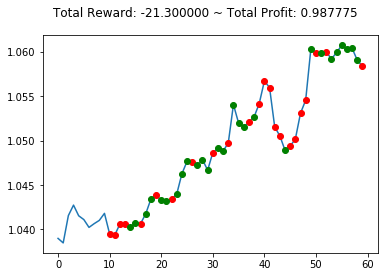

In [0]:
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt

env = gym.make('forex-v0', frame_bound=(50, 100), window_size=10)

observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

In [0]:
!apt-get update && sudo apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [74.7 kB]
Get:14 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 

In [0]:
pip install stable-baselines

In [0]:
from stable_baselines import HER, DQN
from stable_baselines.her import GoalSelectionStrategy, HERGoalEnvWrapper

model_class = DQN  # works also with SAC, DDPG and TD3

#env = BitFlippingEnv(N_BITS, continuous=model_class in [DDPG, SAC, TD3], max_steps=N_BITS)
env = gym.make('forex-v0', frame_bound=(50, 100), window_size=10)

# Available strategies (cf paper): future, final, episode, random
goal_selection_strategy = 'future' # equivalent to GoalSelectionStrategy.FUTURE

# Wrap the model
model = HER('MlpPolicy', env, model_class, n_sampled_goal=4, goal_selection_strategy=goal_selection_strategy,
                                                verbose=1)
# Train the model
model.learn(1000)

model.save("./her_bit_env")

# WARNING: you must pass an env
# or wrap your environment with HERGoalEnvWrapper to use the predict method
model = HER.load('./her_bit_env', env=env)

obs = env.reset()
while True:
    action = model.predict(obs)
    obs, reward, done, info = env.step(action)

    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



ImportError: ignored

info: {'total_reward': 0.0, 'total_profit': 0.9829643052645488, 'position': 0}


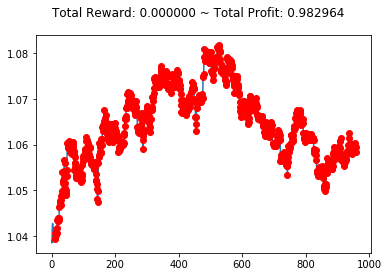

In [0]:
import gym
#from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines import DQN

env = gym.make('forex-v0', frame_bound=(50, 1000), window_size=10, unit_side='left')

model = DQN(MlpPolicy, env, verbose=0)
model.learn(total_timesteps=1000)
#model.save("dqn_env")

#model = DQN.load('dqn_env', env=env)

observation = env.reset()
while True:
    action = model.predict(observation)
    #action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    #env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

In [0]:
env.observation_space

Box(4,)

In [0]:
import gym

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines import DQN

env = gym.make('CartPole-v1')

model = DQN(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=25000)
model.save("deepq_cartpole")

del model # remove to demonstrate saving and loading

model = DQN.load("deepq_cartpole")

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

--------------------------------------
| % time spent exploring  | 29       |
| episodes                | 100      |
| mean 100 episode reward | 18.1     |
| steps                   | 1787     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | 109      |
| steps                   | 12684    |
--------------------------------------
Loading a model without an environment, this model cannot be trained until it has a valid environment.


NoSuchDisplayException: ignored

https://www.ai-articles.net/author/matoksoz/
https://github.com/LantaoYu/MARL-Papers
https://bair.berkeley.edu/blog/2018/12/12/rllib/

https://askubuntu.com/questions/1068819/how-to-upload-a-file-from-google-colab-to-github-or-kaggle
https://cloud.google.com/ai-platform/notebooks/docs/save-to-github
https://datascience.stackexchange.com/questions/37420/how-to-upload-a-saved-file-from-google-colab-to-a-site-such-as-kaggle-or-github
https://dev.to/kriyeng/8-tips-for-google-colab-notebooks-to-take-advantage-of-their-free-of-charge-12gb-ram-gpu-be4
